#CodeAlpha <br>
#DataScience <br>
#Internship Program <br>
Data: 15/06/2025

<h1 style="text-align:center;"> TASK 2: Unemployment Analysis with Python </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
print("\n     Dataset Info: \n")
print(dataset.info())


     Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [7]:
df.rename(columns={
    "Region": "State",
    " Date": "Date",
    " Estimated Unemployment Rate (%)": "Unemployment_Rate",
    " Estimated Employed": "Employed",
    " Estimated Labour Participation Rate (%)": "Labour_Participation_Rate"
}, inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [18]:
dataset.columns = dataset.columns.str.strip()

In [34]:
df.columns = df.columns.str.strip()
print("\nDataset Info:")
print(df.info())

df.rename(columns={
    "Region": "State",
    "Estimated Unemployment Rate (%)": "Unemployment_Rate",
    "Estimated Employed": "Employed",
    "Estimated Labour Participation Rate (%)": "Labour_Participation_Rate"
}, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      267 non-null    object        
 1   Date                       267 non-null    datetime64[ns]
 2   Frequency                  267 non-null    object        
 3   Unemployment_Rate          267 non-null    float64       
 4   Employed                   267 non-null    int64         
 5   Labour_Participation_Rate  267 non-null    float64       
 6   Region.1                   267 non-null    object        
 7   longitude                  267 non-null    float64       
 8   latitude                   267 non-null    float64       
 9   Month                      267 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 21.0+ KB
None


In [11]:
print("\nDescriptive Statistics:")
print(dataset.describe())


Descriptive Statistics:
        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                         

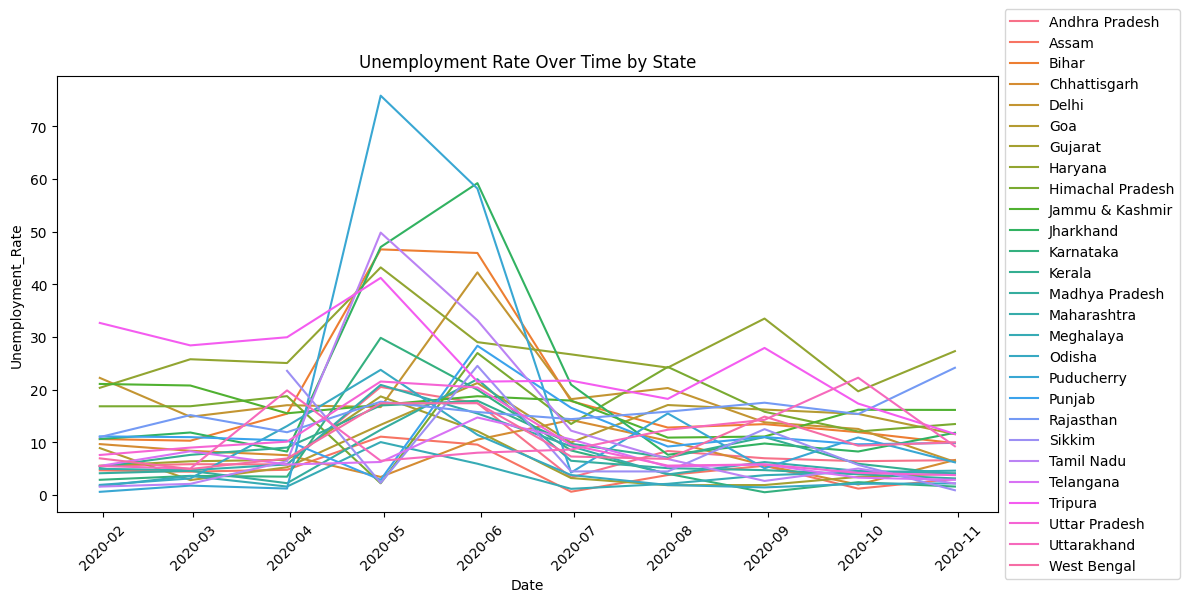

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='State')
plt.title("Unemployment Rate Over Time by State")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

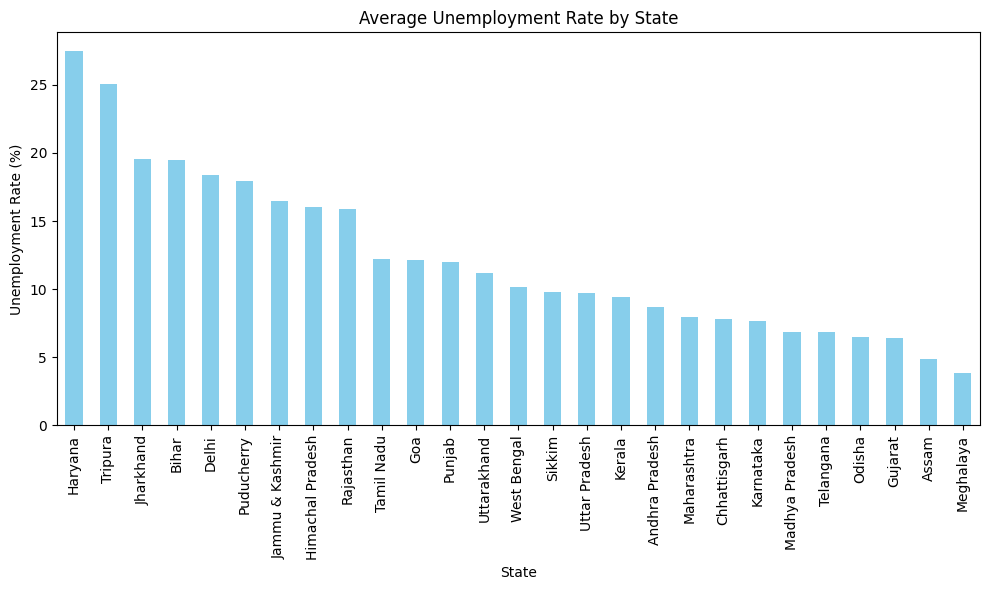

In [32]:
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
state_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by State")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

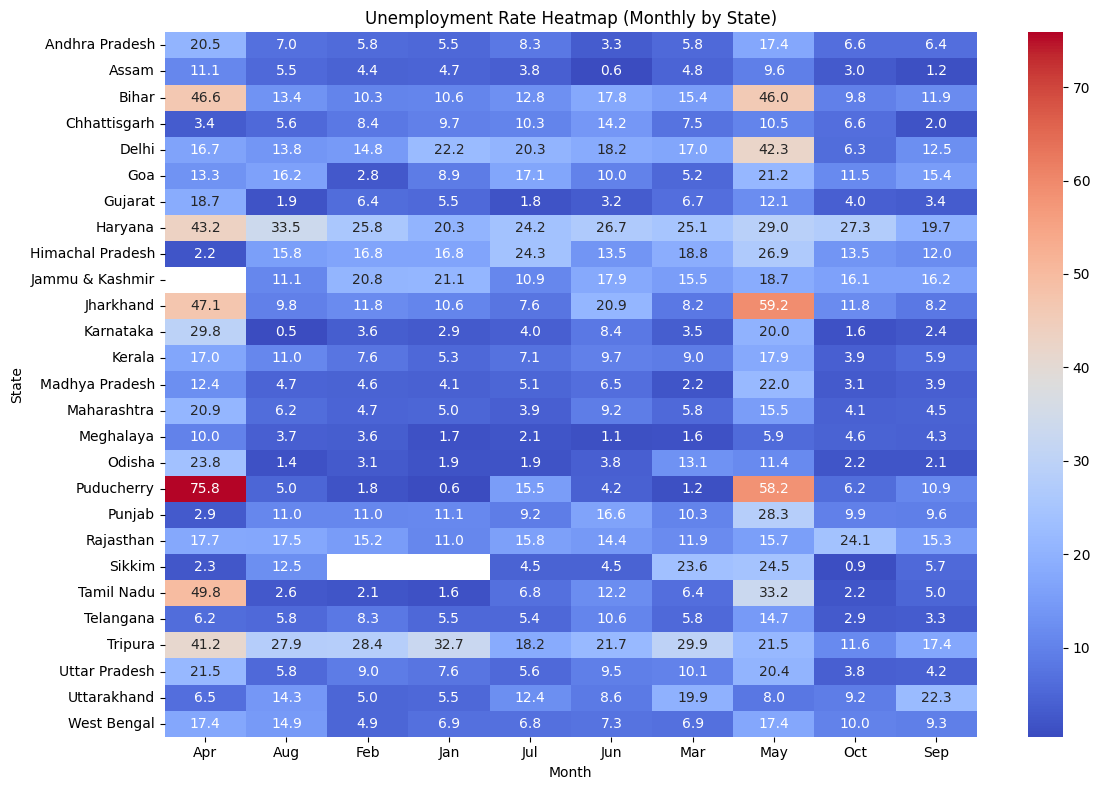

In [33]:
df['Month'] = df['Date'].dt.strftime('%b')

pivot = df.pivot_table(values='Unemployment_Rate', index='State', columns='Month')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Unemployment Rate Heatmap (Monthly by State)")
plt.tight_layout()
plt.show()